# 6. 案例1：预测d带中心

## 6.1 导入数据

### 6.1.1 导入d带中心数据

In [1]:
import numpy as np
import pandas as pd

In [2]:
f = open('data_impurities.csv',encoding = 'UTF-8')
df = pd.read_csv(f, index_col = 0)
df

,Fe,Co,Ni,Cu,Ru,Rh,Pd,Ag,Ir,Pt,Au
Fe,-0.92,0.05,-0.20,-0.13,-0.29,-0.54,-1.24,-0.83,-0.36,-1.09,-1.42
Co,0.01,-1.17,-0.28,-0.16,-0.24,-0.58,-1.37,-0.91,-0.36,-1.19,-1.56
Ni,0.09,0.19,-1.29,0.19,-0.14,-0.31,-0.97,-0.53,-0.14,-0.80,-1.13
Cu,0.56,0.60,0.27,-2.67,0.58,0.32,-0.64,-0.70,0.58,-0.33,-1.09
Ru,0.21,0.26,0.01,0.12,-1.41,-0.17,-0.82,-0.27,0.02,-0.62,-0.84
Rh,0.24,0.34,0.16,0.44,0.04,-1.73,-0.54,0.07,0.17,-0.35,-0.49
Pd,0.37,0.54,0.50,0.94,0.24,0.36,-1.83,0.59,0.53,0.19,0.17
Ag,0.72,0.84,0.67,0.47,0.84,0.86,0.14,-4.30,1.14,0.50,-0.15
Ir,0.21,0.27,0.05,0.21,0.09,-0.15,-0.73,-0.13,-2.11,-0.56,-0.74
Pt,0.33,0.48,0.40,0.72,0.14,0.23,-0.17,0.44,0.38,-2.25,-0.05


### 6.1.2 查看数值

In [3]:
df.loc['Co','Ni']

-0.28

In [4]:
df.loc['Co']

Fe    0.01
Co   -1.17
Ni   -0.28
Cu   -0.16
Ru   -0.24
Rh   -0.58
Pd   -1.37
Ag   -0.91
Ir   -0.36
Pt   -1.19
Au   -1.56
Name: Co, dtype: float64

### 6.1.3 遍历dataframe

In [5]:
for i in df.index:
    for j in df.columns:
        if(i == 'Fe' and j == 'Fe'):
            print('host ' + i + ', guest ' + j + ', val ' + str(df.loc[i, j]))

host Fe, guest Fe, val -0.92


### 6.1.4 将d带中心数据从相对值更改为绝对值

In [6]:
for i in df.index:
    for j in df.columns:
        if i != j:
            df.loc[i, j] += df.loc[i, i]

df

,Fe,Co,Ni,Cu,Ru,Rh,Pd,Ag,Ir,Pt,Au
Fe,-0.92,-0.87,-1.12,-1.05,-1.21,-1.46,-2.16,-1.75,-1.28,-2.01,-2.34
Co,-1.16,-1.17,-1.45,-1.33,-1.41,-1.75,-2.54,-2.08,-1.53,-2.36,-2.73
Ni,-1.20,-1.10,-1.29,-1.10,-1.43,-1.60,-2.26,-1.82,-1.43,-2.09,-2.42
Cu,-2.11,-2.07,-2.40,-2.67,-2.09,-2.35,-3.31,-3.37,-2.09,-3.00,-3.76
Ru,-1.20,-1.15,-1.40,-1.29,-1.41,-1.58,-2.23,-1.68,-1.39,-2.03,-2.25
Rh,-1.49,-1.39,-1.57,-1.29,-1.69,-1.73,-2.27,-1.66,-1.56,-2.08,-2.22
Pd,-1.46,-1.29,-1.33,-0.89,-1.59,-1.47,-1.83,-1.24,-1.30,-1.64,-1.66
Ag,-3.58,-3.46,-3.63,-3.83,-3.46,-3.44,-4.16,-4.30,-3.16,-3.80,-4.45
Ir,-1.90,-1.84,-2.06,-1.90,-2.02,-2.26,-2.84,-2.24,-2.11,-2.67,-2.85
Pt,-1.92,-1.77,-1.85,-1.53,-2.11,-2.02,-2.42,-1.81,-1.87,-2.25,-2.30


## 6.2 添加描述符

### 6.2.1 导入描述符

In [7]:
f = open('data_impurities_features.csv',encoding = 'UTF-8')
feat = pd.read_csv(f, index_col = 0)
feat

,name,group,bulk wigner-seitz radius,atomic number,atomic mass,period,electronegativity,Iionization energy(eV),H_fus,density
Fe,Iron,8,2.66,26,55.84500,4,1.83,7.9024,247.3,7.87
Co,Cobalt,9,2.62,27,58.93320,4,1.88,7.8810,272.5,8.86
Ni,Nickel,10,2.60,28,58.69340,4,1.91,7.6398,290.3,8.90
Cu,Copper,11,2.67,29,63.54600,4,1.90,7.7264,203.5,8.96
Ru,Ruthenium,8,2.79,44,101.07000,5,2.20,7.3605,381.8,12.10
Rh,Rhodium,9,2.81,45,102.90550,5,2.28,7.4589,258.4,12.40
Pd,Palladium,10,2.87,46,106.42000,5,2.20,8.3369,157.3,12.00
Ag,Silver,11,3.01,47,107.86820,5,1.93,7.5762,104.6,10.50
Ir,Iridium,9,2.84,77,192.21700,6,2.20,8.9670,213.9,22.50
Pt,Platinum,10,2.90,78,195.07800,6,2.20,8.9588,113.6,21.50


### 6.2.2 查看特征值

In [8]:
feat.head(4)

,name,group,bulk wigner-seitz radius,atomic number,atomic mass,period,electronegativity,Iionization energy(eV),H_fus,density
Fe,Iron,8,2.66,26,55.8450,4,1.83,7.9024,247.3,7.87
Co,Cobalt,9,2.62,27,58.9332,4,1.88,7.8810,272.5,8.86
Ni,Nickel,10,2.60,28,58.6934,4,1.91,7.6398,290.3,8.90
Cu,Copper,11,2.67,29,63.5460,4,1.90,7.7264,203.5,8.96


In [9]:
feat.loc['Co']

name                         Cobalt
group                             9
bulk wigner-seitz radius       2.62
atomic number                    27
atomic mass                 58.9332
period                            4
electronegativity              1.88
Iionization energy(eV)        7.881
H_fus                         272.5
density                        8.86
Name: Co, dtype: object

### 6.2.3 移除无关项

In [10]:
feat = feat.drop('name', axis='columns')
feat

,group,bulk wigner-seitz radius,atomic number,atomic mass,period,electronegativity,Iionization energy(eV),H_fus,density
Fe,8,2.66,26,55.84500,4,1.83,7.9024,247.3,7.87
Co,9,2.62,27,58.93320,4,1.88,7.8810,272.5,8.86
Ni,10,2.60,28,58.69340,4,1.91,7.6398,290.3,8.90
Cu,11,2.67,29,63.54600,4,1.90,7.7264,203.5,8.96
Ru,8,2.79,44,101.07000,5,2.20,7.3605,381.8,12.10
Rh,9,2.81,45,102.90550,5,2.28,7.4589,258.4,12.40
Pd,10,2.87,46,106.42000,5,2.20,8.3369,157.3,12.00
Ag,11,3.01,47,107.86820,5,1.93,7.5762,104.6,10.50
Ir,9,2.84,77,192.21700,6,2.20,8.9670,213.9,22.50
Pt,10,2.90,78,195.07800,6,2.20,8.9588,113.6,21.50


### 6.2.4 设置输入输出

In [11]:
x = list()
y = list()
for i in df.index:
    for j in df.columns:
        vec_i = feat.loc[i].to_numpy()
        vec_j = feat.loc[j].to_numpy()
        x_val = np.concatenate((vec_i, vec_j))
        y_val = df.loc[i][j]
        x.append(x_val)
        y.append(y_val)
        if i == 'Fe' and j =='Co':
            print('host ' + i + ', guest ' + j + ', input = ' + str(x_val) + ', output = ' + str(y_val))          

host Fe, guest Co, input = [  8.       2.66    26.      55.845    4.       1.83     7.9024 247.3
   7.87     9.       2.62    27.      58.9332   4.       1.88     7.881
 272.5      8.86  ], output = -0.87


In [12]:
X = np.array(x)
y = np.array(y)
X.shape, y.shape

((121, 18), (121,))

## 6.3 回归预测

### 6.3.1 shuffle()

In [13]:
from sklearn.utils import shuffle
X_r, y_r = shuffle(X,y)
X_train, y_train = X_r[:-30, :], y_r[:-30]
X_test, y_test = X_r[-30:, :], y_r[-30:]

### 6.3.2 最小二乘回归

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

Text(0, 0.5, 'prediction')

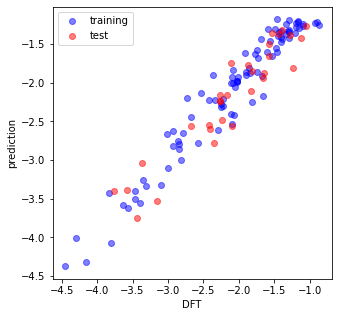

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
plt.scatter(y_train, y_pred_train_lr, alpha=0.5, color = 'blue', label = 'training')
plt.scatter(y_test, y_pred_test_lr, alpha=0.5, color = 'red', label = 'test')
plt.legend()
plt.xlabel('DFT')
plt.ylabel('prediction')

In [16]:
from sklearn.metrics import mean_squared_error
rmse_tr_lr = mean_squared_error(y_train, y_pred_train_lr, squared=False)
rmse_te_lr = mean_squared_error(y_test, y_pred_test_lr, squared=False)
print('RMSE(training)%.3f' % rmse_tr_lr)
print('RMSE(test)%.3f' % rmse_te_lr)

RMSE(training)0.201
RMSE(test)0.255


### 6.3.3 交叉验证

In [17]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits = 10, shuffle = True)
r2_scores_lr = cross_val_score(lr, X, y, scoring = 'r2', cv = crossvalidation)
rmse_scores_lr = cross_val_score(lr, X, y, scoring = 'neg_root_mean_squared_error', cv = crossvalidation)

print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(r2_scores_lr), r2_scores_lr.mean()))
print('Folds: %i, mean RMSE: %.3f' % (len(rmse_scores_lr), -rmse_scores_lr.mean()))

Cross-validation results:
Folds: 10, mean R2: 0.888
Folds: 10, mean RMSE: 0.244


In [18]:
from sklearn.model_selection import KFold, cross_val_score

crossvalidation = KFold(n_splits = 10, shuffle = True)
r2_scores_lr = cross_val_score(lr, X, y, scoring = 'r2', cv = crossvalidation)
rmse_scores_lr = cross_val_score(lr, X, y, scoring = 'neg_root_mean_squared_error', cv = crossvalidation)

print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(r2_scores_lr), r2_scores_lr.mean()))
print('Folds: %i, mean RMSE: %.3f' % (len(rmse_scores_lr), -rmse_scores_lr.mean()))

Cross-validation results:
Folds: 10, mean R2: 0.890
Folds: 10, mean RMSE: 0.251


### 6.3.4 梯度提升回归

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_train_gbr = gbr.predict(X_train)
y_pred_test_gbr = gbr.predict(X_test)

Text(0, 0.5, 'prediction')

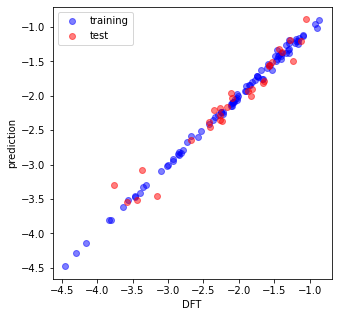

In [20]:
plt.figure(figsize = (5,5))
plt.scatter(y_train, y_pred_train_gbr, alpha=0.5, color = 'blue', label = 'training')
plt.scatter(y_test, y_pred_test_gbr, alpha=0.5, color = 'red', label = 'test')
plt.legend()
plt.xlabel('DFT')
plt.ylabel('prediction')

In [21]:
rmse_tr_gbr = mean_squared_error(y_train, y_pred_train_gbr, squared=False)
rmse_te_gbr = mean_squared_error(y_test, y_pred_test_gbr, squared=False)
print('RMSE(training)%.3f' % rmse_tr_gbr)
print('RMSE(test)%.3f' % rmse_te_gbr)

RMSE(training)0.041
RMSE(test)0.150


### 6.3.5 交叉验证

In [22]:
crossvalidation = KFold(n_splits = 10, shuffle = True)
r2_scores_gbr = cross_val_score(gbr, X, y, scoring = 'r2', cv = crossvalidation)
rmse_scores_gbr = cross_val_score(gbr, X, y, scoring = 'neg_root_mean_squared_error', cv = crossvalidation)

print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(r2_scores_gbr), r2_scores_gbr.mean()))
print('Folds: %i, mean RMSE: %.3f' % (len(rmse_scores_gbr), -rmse_scores_gbr.mean()))

Cross-validation results:
Folds: 10, mean R2: 0.958
Folds: 10, mean RMSE: 0.134


## 6.4 数据分析

### 6.4.1 数据分析

In [23]:
df = pd.DataFrame(x)
df['y'] = y
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,y
0,8.0,2.66,26.0,55.845,4.0,1.83,7.9024,247.3,7.87,8.0,2.66,26.0,55.8450,4.0,1.83,7.9024,247.3,7.87,-0.92
1,8.0,2.66,26.0,55.845,4.0,1.83,7.9024,247.3,7.87,9.0,2.62,27.0,58.9332,4.0,1.88,7.8810,272.5,8.86,-0.87
2,8.0,2.66,26.0,55.845,4.0,1.83,7.9024,247.3,7.87,10.0,2.60,28.0,58.6934,4.0,1.91,7.6398,290.3,8.90,-1.12
3,8.0,2.66,26.0,55.845,4.0,1.83,7.9024,247.3,7.87,11.0,2.67,29.0,63.5460,4.0,1.90,7.7264,203.5,8.96,-1.05
4,8.0,2.66,26.0,55.845,4.0,1.83,7.9024,247.3,7.87,8.0,2.79,44.0,101.0700,5.0,2.20,7.3605,381.8,12.10,-1.21
5,8.0,2.66,26.0,55.845,4.0,1.83,7.9024,247.3,7.87,9.0,2.81,45.0,102.9055,5.0,2.28,7.4589,258.4,12.40,-1.46
6,8.0,2.66,26.0,55.845,4.0,1.83,7.9024,247.3,7.87,10.0,2.87,46.0,106.4200,5.0,2.20,8.3369,157.3,12.00,-2.16
7,8.0,2.66,26.0,55.845,4.0,1.83,7.9024,247.3,7.87,11.0,3.01,47.0,107.8682,5.0,1.93,7.5762,104.6,10.50,-1.75
8,8.0,2.66,26.0,55.845,4.0,1.83,7.9024,247.3,7.87,9.0,2.84,77.0,192.2170,6.0,2.20,8.9670,213.9,22.50,-1.28
9,8.0,2.66,26.0,55.845,4.0,1.83,7.9024,247.3,7.87,10.0,2.90,78.0,195.0780,6.0,2.20,8.9588,113.6,21.50,-2.01


各个x与y分布图

<AxesSubplot:>

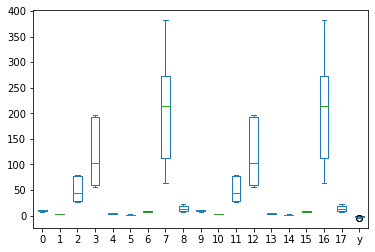

In [24]:
df.plot.box()

查看x与y的关系

<AxesSubplot:>

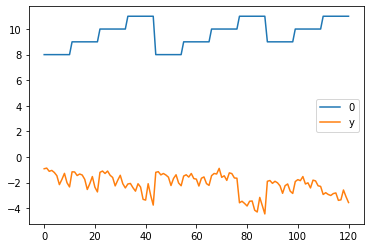

In [25]:
idx = [0, 'y']
df[idx].plot()

<AxesSubplot:xlabel='0', ylabel='y'>

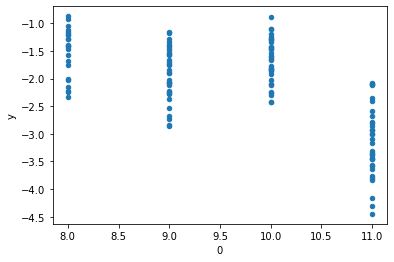

In [26]:
df.plot.scatter(x = 0, y = 'y')

In [27]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,y
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,9.636364,2.797273,47.818182,112.685714,4.909091,2.084545,8.093945,209.800000,13.171818,9.636364,2.797273,47.818182,112.685714,4.909091,2.084545,8.093945,209.800000,13.171818,-2.115868
std,1.072381,0.138618,20.123369,54.126480,0.795822,0.188122,0.640997,89.804938,5.128033,1.072381,0.138618,20.123369,54.126480,0.795822,0.188122,0.640997,89.804938,5.128033,0.818380
min,8.000000,2.600000,26.000000,55.845000,4.000000,1.830000,7.360500,64.600000,7.870000,8.000000,2.600000,26.000000,55.845000,4.000000,1.830000,7.360500,64.600000,7.870000,-4.450000
25%,9.000000,2.660000,28.000000,58.933200,4.000000,1.900000,7.576200,113.600000,8.900000,9.000000,2.660000,28.000000,58.933200,4.000000,1.900000,7.576200,113.600000,8.900000,-2.580000
50%,10.000000,2.810000,45.000000,102.905500,5.000000,2.200000,7.881000,213.900000,12.000000,10.000000,2.810000,45.000000,102.905500,5.000000,2.200000,7.881000,213.900000,12.000000,-2.020000
75%,11.000000,2.900000,77.000000,192.217000,6.000000,2.200000,8.958800,272.500000,19.300000,11.000000,2.900000,77.000000,192.217000,6.000000,2.200000,8.958800,272.500000,19.300000,-1.460000
max,11.000000,3.010000,79.000000,196.966550,6.000000,2.400000,9.225500,381.800000,22.500000,11.000000,3.010000,79.000000,196.966550,6.000000,2.400000,9.225500,381.800000,22.500000,-0.870000


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

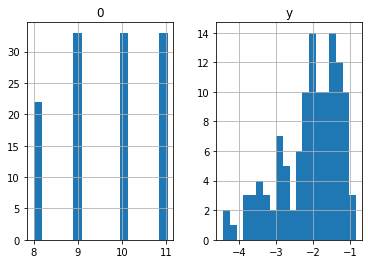

In [28]:
idx=[0,'y']
df[idx].hist(bins=20, width  = 0.2)

### 6.4.2 查看相关性

In [29]:
df.corr()['y']

0    -0.628485
1    -0.528149
2    -0.291100
3    -0.286463
4    -0.262104
5    -0.024741
6    -0.152404
7     0.564631
8    -0.169864
9    -0.236039
10   -0.347411
11   -0.264994
12   -0.260405
13   -0.274515
14   -0.279717
15   -0.240431
16    0.329626
17   -0.196517
y     1.000000
Name: y, dtype: float64